# TP8: EM + KMeans

**Alumna**: Lucia Berard

**Fecha**: 01/06/2025

[Link a Google Colab](https://colab.research.google.com/drive/1AR-mJnZDkuaja74O0NeDQ9wXQuYzKCIl?usp=sharingg)


En el archivo `instrumentos.zip` encontrar√° audios de diferentes instrumentos musicales. Se desea clasificar entre las 5 clases de instrumentos presentes en la base de datos.



---

## (a) Exploraci√≥n de datos

#### a.1) Utilizando `load` ([librosa](https://librosa.org/doc/latest/index.html)), construir 5 conjuntos de datos de entrenamiento y 5 de testeo (uno por instrumento). Reservar el √∫ltimo archivo de cada instrumento para el conjunto de testeo, y utilizar el resto para entrenamiento.


In [2]:
%pip install librosa

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 260 kB 9.4 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 14.5 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.7 MB 43.3 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 81 kB 34.4 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 64 kB 16.7 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 160 kB 12.4 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28.8 MB 11.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/luberard/Documents/fiuba/

In [ ]:
# Imports genericos
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Imports del tp
import librosa
from IPython.display import Audio
from scipy.signal import stft
from sklearn.mixture import GaussianMixture
from scipy.special import softmax
from collections import defaultdict

In [27]:
# Descomprimir instrumentos.zip 
# Supongo que el archivo existe y conozco su estructura
![ -d instrumentos ] || unzip -d instrumentos instrumentos.zip

In [ ]:
# Buscar todos los archivos .mp3 en la carpeta instrumentos (no recursivo porque ya se que no hay subcarpetas)
audio_files = [os.path.join('instrumentos', f) for f in os.listdir('instrumentos') if f.lower().endswith('.mp3')]

# Agrupar por instrumento: se asume que el nombre del instrumento es el prefijo antes del primer guion bajo
inst_files = defaultdict(list)
for f in audio_files:
    base = os.path.basename(f)
    inst = base.split('_')[0].lower()
    inst_files[inst].append(f)

# Separar en train y test: el √∫ltimo archivo de cada instrumento para test (enunciado)
train_files = {}
test_files = {}
for inst, files in inst_files.items():
    files = sorted(files)
    train_files[inst] = files[:-1]
    test_files[inst] = [files[-1]]

# Cargar audios con librosa
train_data = {inst: [librosa.load(f, sr=None)[0] for f in files] for inst, files in train_files.items()}
test_data = {inst: [librosa.load(f, sr=None)[0] for f in files] for inst, files in test_files.items()}

# Verificar las claves (instrumentos) y la cantidad de archivos en cada conjunto
print("Instrumentos encontrados:", list(train_data.keys()))
for inst in train_data:
    print(f"{inst}: {len(train_data[inst])} archivos para entrenamiento, {len(test_data[inst])} para testeo")


Instrumentos encontrados: ['trumpet', 'guitar', 'clarinet', 'violin', 'saxophone']
trumpet: 4 archivos para entrenamiento, 1 para testeo
guitar: 4 archivos para entrenamiento, 1 para testeo
clarinet: 4 archivos para entrenamiento, 1 para testeo
violin: 4 archivos para entrenamiento, 1 para testeo
saxophone: 4 archivos para entrenamiento, 1 para testeo



#### a.2) Graficar la se√±al temporal de la se√±al de testeo de la guitarra en funci√≥n del tiempo (en segundos).


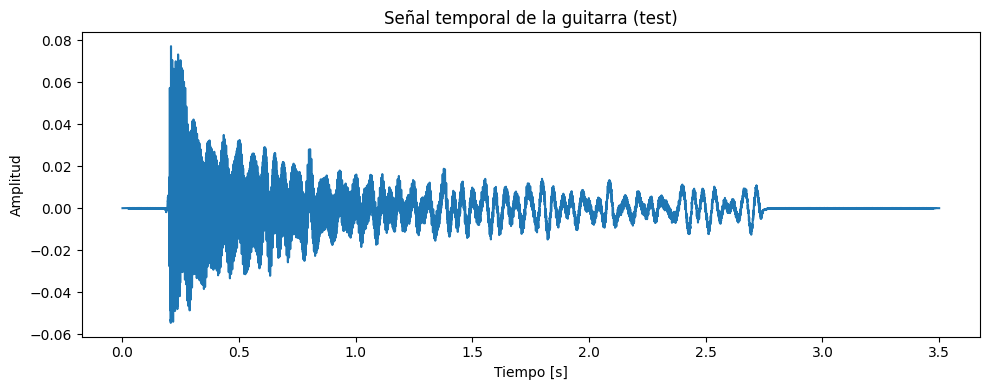

In [32]:
# Obtener la se√±al y la frecuencia de muestreo del archivo de testeo de guitarra
instrumentos = train_data.keys()
signals = {}
for inst in instrumentos:
    test_file = test_files[inst][0]
    signal, sr = librosa.load(test_file, sr=None)
    signals[inst] = signal

# Crear el eje temporal en segundos
t = np.arange(len(signals['guitar'])) / sr

# Graficar la se√±al temporal
plt.figure(figsize=(10, 4))
plt.plot(t, signals['guitar'])
plt.title('Se√±al temporal de la guitarra (test)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()



#### a.3) Reproducir el audio de testeo de la guitarra utilizando `Audio` (IPython).


In [ ]:
Audio(signals['guitar'], rate=sr)

#### a.4) Utilizando [`ShortTimeFFT`](https://docs.scipy.org/doc/scipy-1.15.2/reference/generated/scipy.signal.ShortTimeFFT.html) (scipy.signal). Extraer un espectrograma de cada se√±al. 

üõà *Una buena selecci√≥n de criterios es utilizar una FFT de 64 puntos, un solapamiento del 50%, descartar la parte sim√©trica del espectro y utilizar ventana de _hamming_ de la misma cantidad de puntos de la FFT.*

La funcion de ShortTimeFFT que se usa es `scipy.signal.stft` la cual:
- Divide la se√±al en ventanas (segmentos cortos).
- Calcula la FFT (transformada r√°pida de Fourier) para cada ventana.
- Devuelve las frecuencias, los tiempos y la matriz compleja de la STFT (que luego puedes convertir en espectrograma tomando el m√≥dulo).

Se aprovecho el calculo del espectrograma para generar las matrices de caracter√≠sticas de cada se√±al. Cada columna de la matriz es un vector de caracter√≠sticas (espectrograma) para un instante de tiempo. Esto es lo que se va a utilizar luego para entrenar los Kmeans.

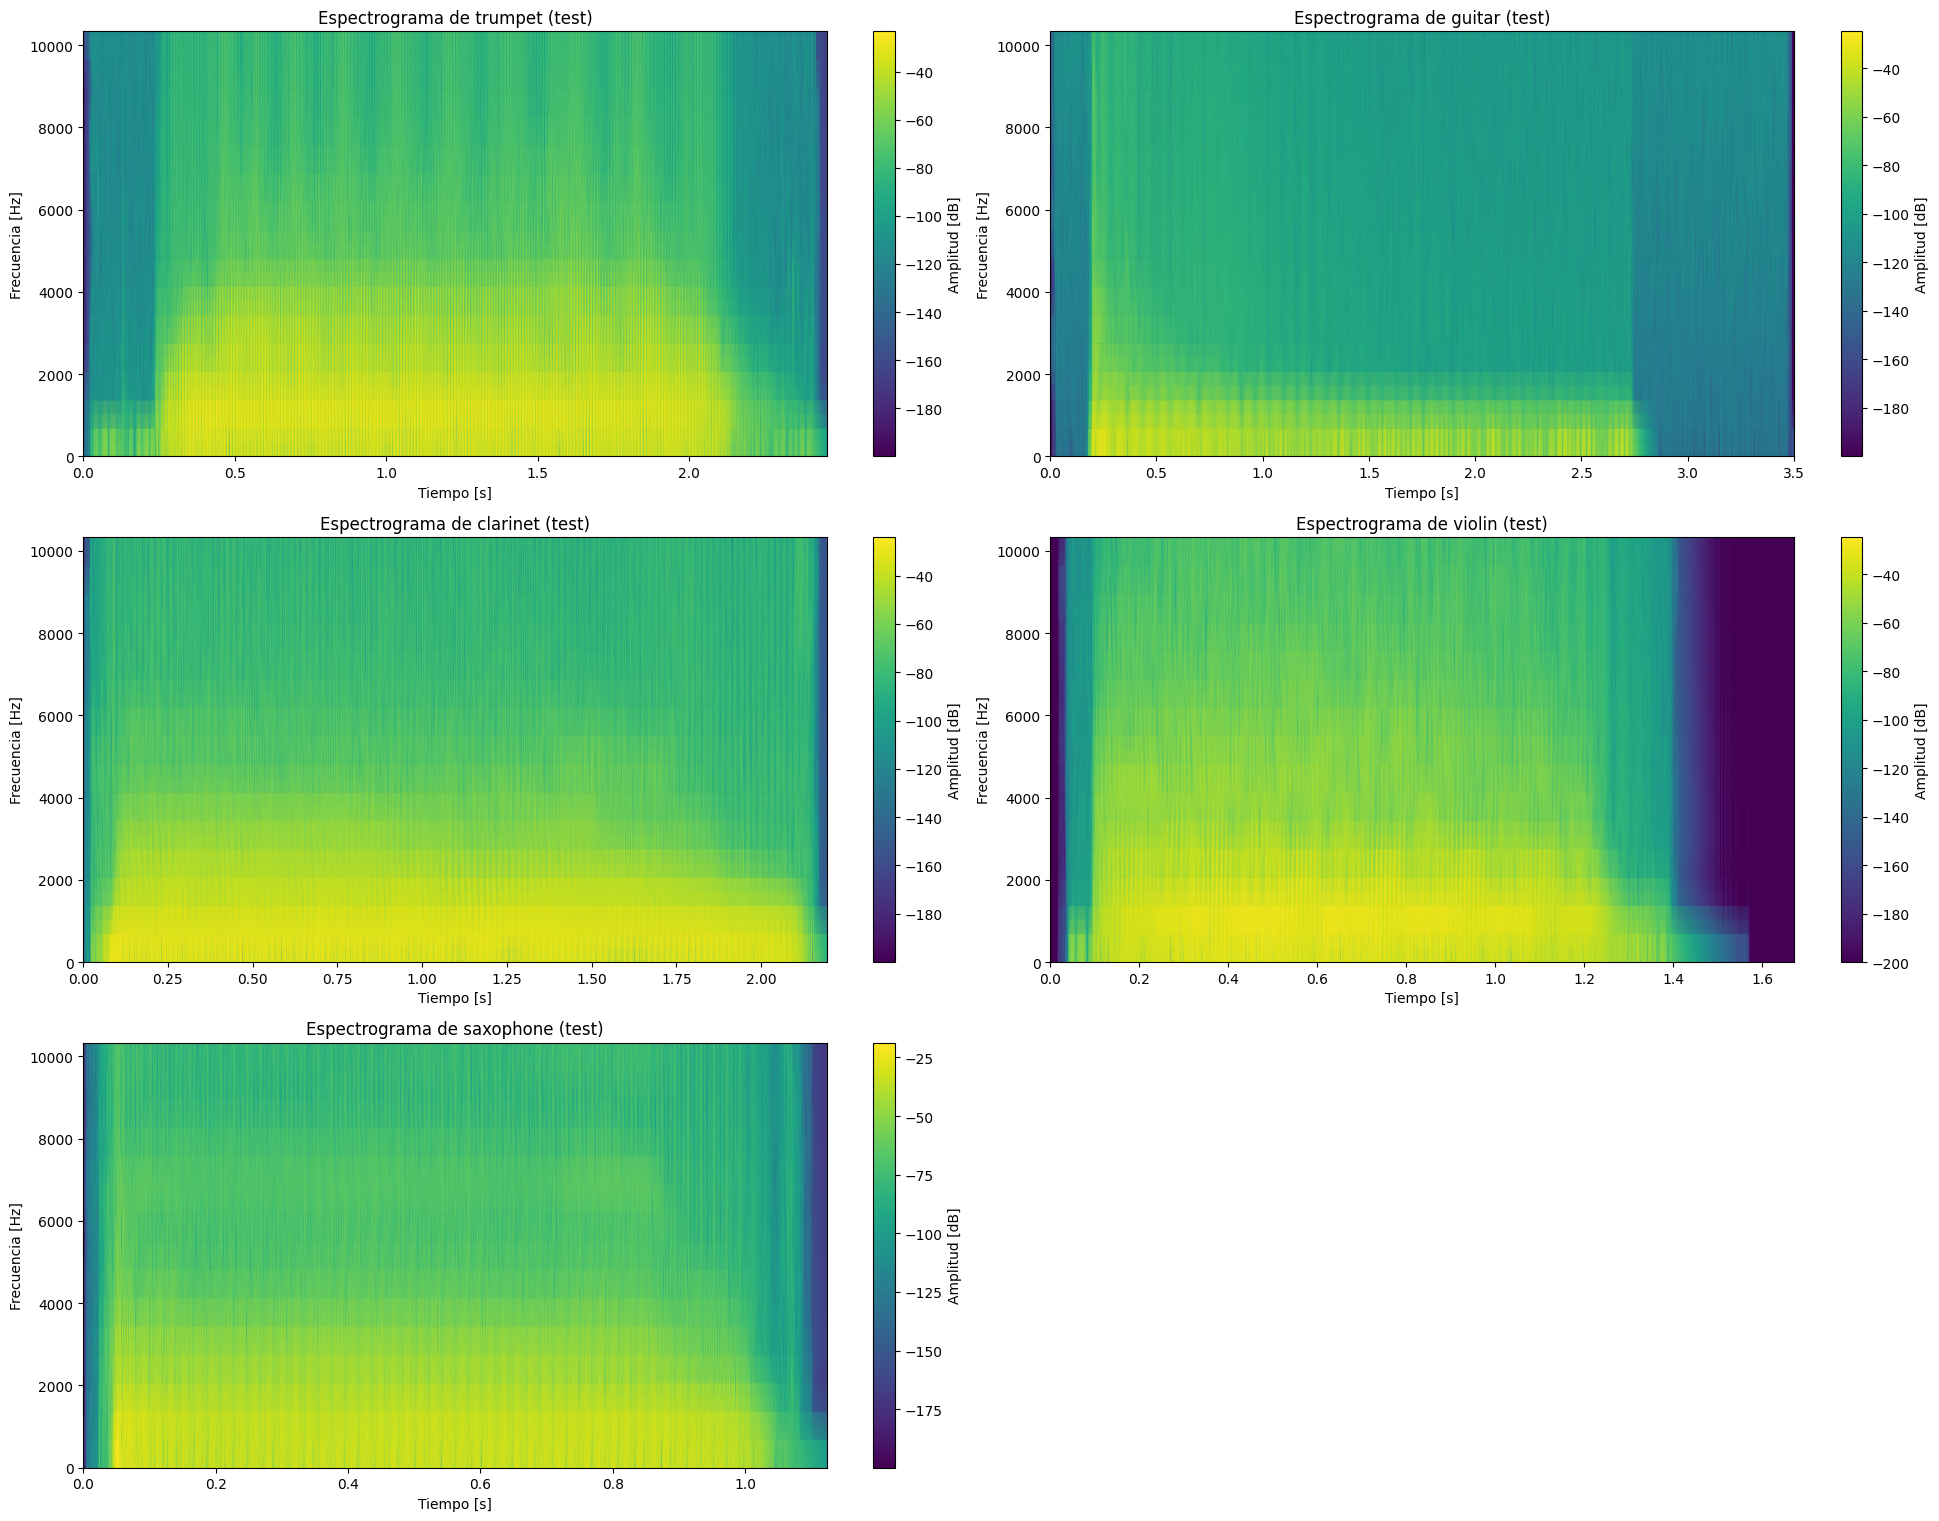

In [43]:
spectrograms = {}

plt.figure(figsize=(20, 25))
for i, inst in enumerate(signals.keys()):
    f, t, Zxx = stft(signals[inst], fs=sr, window='hamming', nperseg=64, noverlap=32, nfft=64)

    # Descarto la parte sim√©trica del espectro (solo frecuencias positivas)
    Zxx = Zxx[:len(f)//2, :]
    f = f[:len(f)//2]

    # M√≥dulo del espectrograma
    # Esto es porque la STFT devuelve un espectrograma complejo (fase y magnitud) pero para este caso 
    # solo necesito la magnitud
    spectrogram = np.abs(Zxx)
    # Filas: frecuencias
    # Columnas: tiempos (frames)

    # Guarda el espectrograma como matriz de caracter√≠sticas (cada columna es un vector en el tiempo)
    # Transponemos para que cada fila sea un vector de caracter√≠sticas
    spectrograms[inst] = spectrogram.T
    # Cada fila: un frame temporal (un vector de caracter√≠sticas para un instante de tiempo)
    # Cada columna: la energ√≠a en una frecuencia espec√≠fica
    # Es una matriz de forma (n_samples, n_features)

    # Graficar el espectrograma
    plt.subplot(5, 2, i+1)
    # 20 * np.log10(spectrogram + 1e-10) para pasar a dB y evitar log(0)
    # shading='gouraud' para suavizar los resultados
    plt.pcolormesh(t, f, 20 * np.log10(spectrogram + 1e-10), shading='gouraud', cmap='viridis')
    plt.title('Espectrograma de ' + inst + ' (test)')
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.colorbar(label='Amplitud [dB]')
    plt.tight_layout()
plt.show()



---
## (b) Entrenamiento

#### b.1) Entrenar 5 algoritmos KMeans (uno por cada instrumento). El c√≥digo debe estar estructurado de la siguiente manera:

  ```python
  class Kmeans:
      # Inicializar atributos y declarar hiperpar√°metros
      def __init__(self, ...):
          ‚Ä¶

      # Etapa de entrenamiento
      def fit(self, X):
          ‚Ä¶

      # Etapa de testeo
      def predict(self, X):
          ‚Ä¶
```


**¬øQu√© es Kmeans?**

KMeans es un algoritmo de aprendizaje no supervisado que sirve para agrupar datos en un n√∫mero fijo de grupos (clusters). El objetivo es encontrar agrupaciones de datos (clusters) de tal manera que los puntos dentro de un mismo grupo sean lo m√°s parecidos posible entre s√≠ y lo m√°s diferentes posible de los de otros grupos.    

**¬øQu√© es una fila de spectrograms[instrumento]?**

Cada fila de spectrograms[instrumento] es un vector de caracter√≠sticas que describe c√≥mo es el contenido frecuencial de la se√±al en un momento espec√≠fico.

In [ ]:
class Kmeans:
    def __init__(self, n_clusters=6, max_iter=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters # Cantidad de clusters
        self.max_iter = max_iter # Cantidad de iteraciones
        self.tol = tol # Tolerancia
        self.random_state = random_state # Semilla para la inicializaci√≥n aleatoria

    def fit(self, X):
        np.random.seed(self.random_state)
        # Inicializaci√≥n aleatoria de los centroides
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx]
        for i in range(self.max_iter):
            # Asignar cada punto al centroide m√°s cercano
            labels = np.argmin(np.linalg.norm(X[:, None] - self.centroids[None], axis=2), axis=1)
            # Actualizaci√≥n: Calcular nuevos centroides (promedio de los puntos de cada cluster)
            new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels == j) else self.centroids[j] for j in range(self.n_clusters)])
            # Verificar convergencia. 
            # Si la diferencia entre los centroides es menor a la tolerancia, se detiene
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids
        self.labels_ = labels # Etiquetas de los clusters

    def predict(self, X):
        # Asignar cada punto al centroide m√°s cercano
        return np.argmin(np.linalg.norm(X[:, None] - self.centroids[None], axis=2), axis=1)


# Entrenar 5 algoritmos KMeans (uno por cada instrumento)
kmeans_models = {}
centroids = {}

for instrumento, X in spectrograms.items():
    kmeans = Kmeans(n_clusters=6, random_state=42)  # Ajusta los hiperpar√°metros seg√∫n tu implementaci√≥n
    kmeans.fit(X)
    kmeans_models[instrumento] = kmeans
    centroids[instrumento] = kmeans.centroids  # O el atributo correspondiente en tu clase




#### b.2) Utilizando `GaussianMixture` (sklearn), entrenar 5 mezclas de 6 gaussianas diagonales cada una (una por cada instrumento) utilizando el algoritmo EM. Inicializar dicho algoritmo utilizando el KMeans desarrollado en el √≠tem anterior.

üõà *Si bien es evidente que los centroides representan las medias de las gaussianas, no es tan claro pensar como inicializar los pesos y varianzas. Justificar su criterio de inicializaci√≥n*



**¬øQu√© es una mezcla de gaussianas (GMM)?**
- Es un modelo probabil√≠stico que asume que los datos provienen de una combinaci√≥n de varias distribuciones normales (gaussianas).
- Cada componente (gaussiana) tiene su propia media, varianza y peso.
- El modelo aprende a ajustar estos par√°metros para que la combinaci√≥n de todas las gaussianas explique lo mejor posible los datos observados.

**¬øQu√© es el algoritmo EM?**
- Es un algoritmo de optimizaci√≥n iterativo que busca encontrar los par√°metros que maximicen la verosimilitud de los datos.
- EM = Expectation-Maximization.

**Justificaci√≥n de la inicializaci√≥n:**
- Medias: Se inicializan con los centroides de KMeans porque cada centroide representa el centro de un grupo (cluster) de datos, que es el rol de la media en una gaussiana.
- Pesos: Se inicializan con la proporci√≥n de muestras asignadas a cada cluster por KMeans, ya que esto refleja la "importancia" relativa de cada componente.
- Varianzas (diagonales): Se inicializan con la varianza de los puntos de cada cluster (por dimensi√≥n), porque esto representa la dispersi√≥n de los datos en cada cluster, que es lo que modela la covarianza de cada gaussiana.

Esto ayuda a que el algoritmo EM converja m√°s r√°pido y a mejores soluciones, ya que comienza con una buena aproximaci√≥n de los par√°metros.

In [ ]:

gmm_models = {}
# Entrenar 5 algoritmos GMM (uno por cada instrumento)
for instrumento, X in spectrograms.items():
    means_init = centroids[instrumento]
    
    # Inicializaci√≥n de pesos: proporci√≥n de puntos asignados a cada cluster
    labels = kmeans_models[instrumento].predict(X)
    weights_init = np.array([(labels == i).sum() for i in range(6)]) / len(X)
    
    # Inicializaci√≥n de covarianzas: varianza de cada cluster (diagonal)
    covariances_init = []
    for i in range(6):
        cluster_points = X[labels == i]
        if len(cluster_points) > 1:
            cov_diag = np.var(cluster_points, axis=0)
        else:
            cov_diag = np.ones(X.shape[1]) * 1e-6  # Evitar singularidad
        covariances_init.append(cov_diag)
    covariances_init = np.array(covariances_init)
    
    gmm = GaussianMixture(
        n_components=6, # cantidad de gaussianas
        covariance_type='diag', # cada componente tendr√° su propia matriz de covarianza diagonal (es decir, asume que las variables son independientes dentro de cada componente).
        means_init=means_init, # Inicializp los centroides (medias) de las gaussianas
        weights_init=weights_init, #Inicializo los pesos de mezcla (la proporci√≥n de cada componente en la mezcla)
        precisions_init=1. / covariances_init  # sklearn usa precisiones (1/var)
    )
    gmm.fit(X)
    gmm_models[instrumento] = gmm


Este c√≥digo entrena, para cada instrumento, un modelo probabil√≠stico (GMM) que describe c√≥mo se distribuyen los vectores de caracter√≠sticas (frames del espectrograma) de ese instrumento, usando como punto de partida los clusters hallados con KMeans. Esto permite modelar de manera flexible la "huella" espectral de cada instrumento.

**¬øCuales son los clusters de KMeans?**

Cada cluster representa un grupo de frames del espectrograma (vectores de caracter√≠sticas de audio) que son similares entre s√≠. En este caso, un cluster podr√≠a agrupar frames que corresponden a notas similares, ataques, silencios, o patrones espectrales parecidos.

**¬øC√≥mo se define a un cluster?**

- **Centroide**: Es el "punto medio" del cluster, calculado como el promedio de todos los puntos asignados a ese cluster.
- **Asignaci√≥n**: Cada dato se asigna al cluster cuyo centroide est√© m√°s cerca.


---
---

## (c) Testeo

#### c.1) Para todas las combinaciones de desea evaluar qu√© tan veros√≠mil es que las muestras de la clase i-√©sima correspondan al modelo j-√©simo. Indicar las log-verosimilitud correspondientes en un cuadro de doble entrada del algoritmo EM.

Quiero saber qu√© tan probable es que los datos de cada instrumento (clase i) hayan sido generados por el modelo de cada instrumento (modelo j).

Esto implica:

1. Para cada combinaci√≥n de conjunto de datos de instrumento (i) y modelo GMM (j), calcular la log-verosimilitud de los datos (D_i) bajo el modelo (j):

$$ \log P(D_i | \text{modelo}_j) $$

2. Organizar estos valores en una matriz (cuadro de doble entrada), donde:
- Las filas representan los instrumentos reales (los datos).
- Las columnas representan los modelos GMM entrenados (uno por instrumento).

Puedo usar la funci√≥n `gmm.score(X)` en sklearn (para un modelo GaussianMixture) calcula la log-verosimilitud promedio de los datos `X` bajo el modelo GMM entrenado

In [63]:
# Lista de instrumentos
instrumentos = list(spectrograms.keys())
print(instrumentos)

# Crear la matriz de log-verosimilitud con ceros
log_likelihood_matrix = np.zeros((len(instrumentos), len(instrumentos)))

# Calcular la log-verosimilitud para cada combinaci√≥n de instrumento y modelo
for i, inst_data in enumerate(instrumentos):
    X = spectrograms[inst_data]
    for j, inst_model in enumerate(instrumentos):
        print(f'inst_data {inst_data}: inst_model {inst_model}')
        gmm = gmm_models[inst_model]
        log_likelihood_matrix[i, j] = gmm.score(X)

# Convertir a DataFrame para visualizaci√≥n
df_ll = pd.DataFrame(
    log_likelihood_matrix,
    index=[f"Clase: {inst}" for inst in instrumentos],
    columns=[f"Modelo: {inst}" for inst in instrumentos]
)

display(df_ll)

['trumpet', 'guitar', 'clarinet', 'violin', 'saxophone']
inst_data trumpet: inst_model trumpet
inst_data trumpet: inst_model guitar
inst_data trumpet: inst_model clarinet
inst_data trumpet: inst_model violin
inst_data trumpet: inst_model saxophone
inst_data guitar: inst_model trumpet
inst_data guitar: inst_model guitar
inst_data guitar: inst_model clarinet
inst_data guitar: inst_model violin
inst_data guitar: inst_model saxophone
inst_data clarinet: inst_model trumpet
inst_data clarinet: inst_model guitar
inst_data clarinet: inst_model clarinet
inst_data clarinet: inst_model violin
inst_data clarinet: inst_model saxophone
inst_data violin: inst_model trumpet
inst_data violin: inst_model guitar
inst_data violin: inst_model clarinet
inst_data violin: inst_model violin
inst_data violin: inst_model saxophone
inst_data saxophone: inst_model trumpet
inst_data saxophone: inst_model guitar
inst_data saxophone: inst_model clarinet
inst_data saxophone: inst_model violin
inst_data saxophone: inst

Modelo: trumpet  Modelo: guitar  Modelo: clarinet  \
Clase: trumpet          84.826376      -50.496117         61.076322   
Clase: guitar           88.437241       92.719768         88.008546   
Clase: clarinet         81.220870       51.069181         85.549067   
Clase: violin           83.281622        1.522136         75.243071   
Clase: saxophone        83.034524       20.200927         77.893407   

                  Modelo: violin  Modelo: saxophone  
Clase: trumpet         79.559507          81.342515  
Clase: guitar          89.351019          88.168726  
Clase: clarinet        77.299801          80.541176  
Clase: violin          84.720579          81.926634  
Clase: saxophone       81.386769          85.570371

**¬øQu√© informaci√≥n aporta este cuadro?**

- Diagonal: Qu√© tan bien cada modelo reconoce su propio instrumento (deber√≠a ser el m√°s alto).
- Fuera de la diagonal: Qu√© tan probable es que un modelo confunda los datos de otro instrumento.

Los resultados no me dieron como esperaba, se nota que para algunos casos como la guitarra, hay mucha diferencia entre clases pero para otros como el trumpet o saxofon, puede llegar a haber confusi√≥n. 



#### c.2) Cada algoritmo j-√©simo define una distribuci√≥n p(j|x). Asumiendo una probabilidad de cada clase P(j) proporcional a la cantidad de muestras de entrenamiento de cada instrumento, calcular las probabilidades a posteriori a partir de la regla de Bayes. Es decir, indicar en un cuadro de doble entrada la probabilidad de la clase j-√©sima para las muestras correspondientes al instrumento i-√©simo P(j|D·µ¢).

üõà *La funci√≥n softmax (scipy) puede ser √∫til.*

Tengo que calcular para cada combinaci√≥n de:
- Datos de instrumento (i) (por ejemplo, todos los frames de guitarra)
- Modelo (j) (por ejemplo, el modelo GMM entrenado para violin)

la probabilidad a posteriori de que los datos ($D_i$) pertenezcan a la clase (j), es decir, ($P(j|D_i)$).

**¬øC√≥mo se calcula $P(j|D_i)$ usando la regla de Bayes?**

La regla de Bayes dice: 

$$ P(j|D_i) = \frac{P(D_i|j) \cdot P(j)}{\sum_k P(D_i|k) \cdot P(k)} $$ 

donde:
$P(D_i|j)$ es la verosimilitud de los datos $D_i$ bajo el modelo (j) (ya calculada como log-verosimilitud en la matriz anterior).
$P(j)$ es la probabilidad a priori de la clase (j), que en este caso debe ser proporcional a la cantidad de muestras de entrenamiento de cada instrumento.
El denominador normaliza para que la suma sobre todas las clases sea 1.

In [ ]:

# 1. Priors: proporcionales a la cantidad de muestras
num_samples = np.array([spectrograms[inst].shape[0] for inst in instrumentos])
priors = num_samples / num_samples.sum()
log_priors = np.log(priors)

# 2. Matriz de log-verosimilitud (del paso anterior): log_likelihood_matrix[i, j]
# 3. Calcular log-posterior (sin normalizar)
log_posterior = log_likelihood_matrix + log_priors  # broadcasting

# 4. Aplicar softmax sobre las columnas (modelos) para cada fila (clase de datos)
posterior_probs = softmax(log_posterior, axis=1)

# 5. Mostrar en DataFrame
df_post = pd.DataFrame(
    posterior_probs,
    index=[f"Clase: {inst}" for inst in instrumentos],
    columns=[f"Modelo: {inst}" for inst in instrumentos]
)

display(df_post)

Modelo: trumpet  Modelo: guitar  Modelo: clarinet  \
Clase: trumpet           0.982746    2.379951e-59      4.256872e-11   
Clase: guitar            0.009358    9.660309e-01      5.447054e-03   
Clase: clarinet          0.014495    1.661254e-15      9.819483e-01   
Clase: violin            0.250665    1.110038e-36      7.230380e-05   
Clase: saxophone         0.144622    1.061427e-28      7.562124e-04   

                  Modelo: violin  Modelo: saxophone  
Clase: trumpet          0.003453           0.013801  
Clase: guitar           0.015890           0.003274  
Clase: clarinet         0.000196           0.003361  
Clase: violin           0.719675           0.029588  
Clase: saxophone        0.018956           0.835666

- Filas: El instrumento real al que pertenecen las muestras.
- Columnas: El modelo de instrumento (o clase) usado para calcular la probabilidad.

El valor en la celda ( (i, j) ) es la probabilidad de que una muestra del instrumento ( i ) pertenezca a la clase ( j ) seg√∫n la regla de Bayes, usando la evidencia dada por el modelo ( j ).

- Diagonal: Los valores en la diagonal muestran la probabilidad de que una muestra de la clase ( i ) sea correctamente clasificada como ( i ). Deber√≠an ser cercanos a 1 en un buen clasificador, lo cual coincide con los resultados obtenidos.
- Fuera de la diagonal: Muestran la probabilidad de que una muestra de la clase ( i ) sea clasificada err√≥neamente como otra clase ( j ). Deber√≠an ser cercanos a 0, lo cual tambien coincide con los resultados de la tabla.


#### c.3) Sea x(t) la se√±al correspondiente al audio de testeo de la guitarra. Graficar log P(j|x(t)) en funci√≥n del tiempo, para cada uno de los 5 instrumentos (indexados por j).

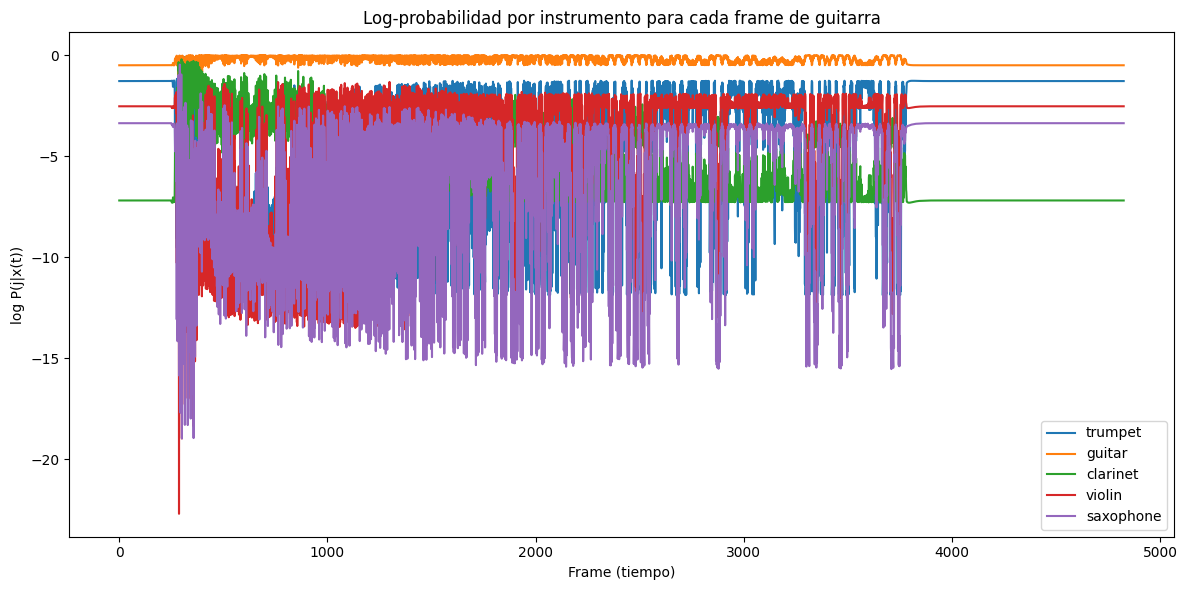

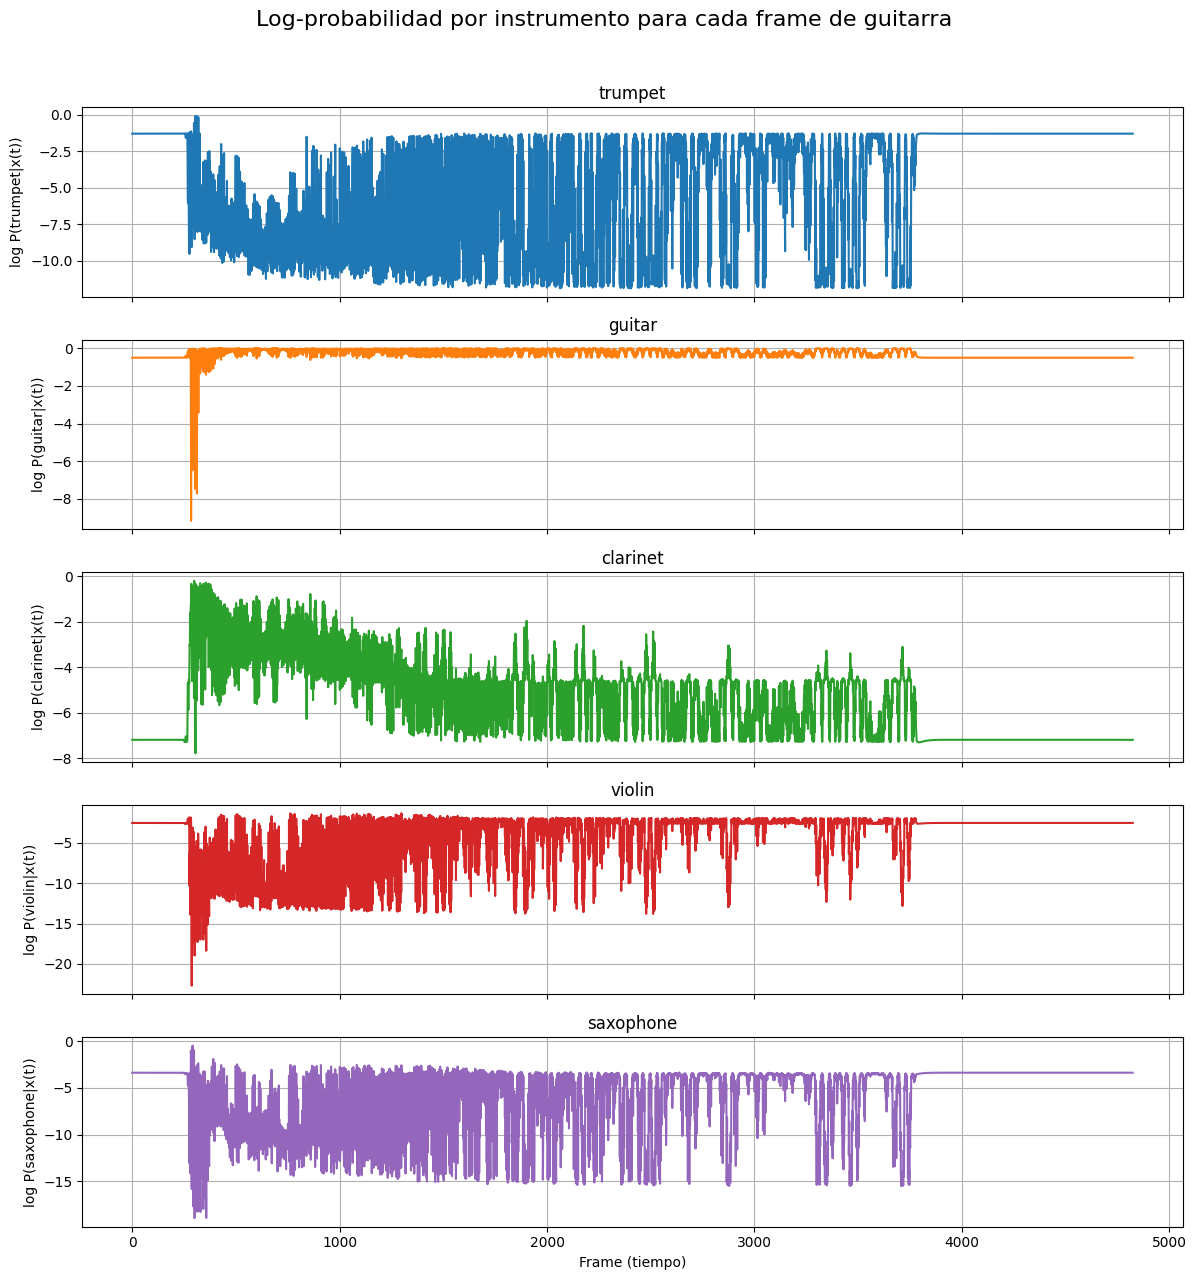

In [65]:
# 1. Extraer frames de guitarra
X_guitarra = spectrograms['guitar']
num_frames = X_guitarra.shape[0]
instrumentos = list(gmm_models.keys())

# 2. Log-priors
num_samples = np.array([spectrograms[inst].shape[0] for inst in instrumentos])
priors = num_samples / num_samples.sum()
log_priors = np.log(priors)

# 3. Para cada frame, calcular log P(j|x(t))
log_posteriors = np.zeros((num_frames, len(instrumentos)))

for t in range(num_frames):
    log_liks = np.array([gmm_models[inst].score_samples(X_guitarra[t:t+1])[0] for inst in instrumentos])
    log_joint = log_liks + log_priors
    log_posteriors[t, :] = log_joint - np.log(np.sum(np.exp(log_joint)))  # log softmax

# 4. Graficar
plt.figure(figsize=(12, 6))
for j, inst in enumerate(instrumentos):
    plt.plot(log_posteriors[:, j], label=inst)
plt.xlabel('Frame (tiempo)')
plt.ylabel('log P(j|x(t))')
plt.title('Log-probabilidad por instrumento para cada frame de guitarra')
plt.legend()
plt.tight_layout()
plt.show()

num_instruments = len(instrumentos)
fig, axes = plt.subplots(num_instruments, 1, figsize=(12, 2.5 * num_instruments), sharex=True)

for j, inst in enumerate(instrumentos):
    ax = axes[j] if num_instruments > 1 else axes
    ax.plot(log_posteriors[:, j], color='C'+str(j))
    ax.set_ylabel(f'log P({inst}|x(t))')
    ax.set_title(f'{inst}')
    ax.grid(True)

axes[-1].set_xlabel('Frame (tiempo)')
plt.suptitle('Log-probabilidad por instrumento para cada frame de guitarra', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()